# 1. Reading data

In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import fetch_species_distributions, load_digits
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import KFold 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsIC
from sklearn.preprocessing import MinMaxScaler

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data_AP.csv",dtype={'Symbol': np.str},parse_dates=['Accper'])

C:\Users\andre\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [3]:
tier25=data.iloc[:,-1].quantile(0.25)
tier75=data.iloc[:,-1].quantile(0.75)
data['classification']=0
for i in range(0,len(data.iloc[:,-1])):
    if (data.iloc[i,-2]<=tier25):
        data.iloc[i,-1]=-1
    elif (data.iloc[i,-2]>=tier75):
        data.iloc[i,-1]=1
    else:
        data.iloc[i,-1]=0
data
data['classification']=data['classification'].astype(int)

In [4]:
data

,Stkcd,Accper,Current_Ratio,Liquidity_Ratio,Cash_Ratio,Cash_Flow_Interest_Coverage_Ratio,Asset-liability_Ratio,Equity_Ratio,Total_Assets_Growth_Rate,Net_Profit_Growth_Rate,...,Return_On_Assets,Return_On_Net_Assets,EBIT,Operating_Profit_Margin,Cost_Profit_Margin,Cash-To-Profit_Ratio,Return_On_Investment,EPS,Future_EPS,classification
0,0055.HK,2019-03-31,1.042785,0.577486,0.163058,19.986092,0.270758,0.371286,-0.005702,0.100264,...,0.021926,0.020527,1.380945e+08,0.071808,0.079216,0.656901,0.004662,0.050030,0.092089,0
1,0055.HK,2019-09-30,1.028640,0.607188,0.197985,365.451594,0.269749,0.369392,0.019587,0.243492,...,0.055420,0.053246,3.517456e+08,0.069937,0.085160,1.590517,0.014966,0.112168,0.156581,0
2,0055.HK,2019-12-31,1.018991,0.630694,0.171091,204.414341,0.278266,0.385551,0.047187,0.379693,...,0.073880,0.072159,4.763158e+08,0.071424,0.085806,1.533349,0.020098,0.156581,0.007666,-1
3,0055.HK,2020-03-31,1.035491,0.623834,0.177662,-68.529810,0.269218,0.368398,0.039166,-0.762738,...,0.005578,0.004640,3.665077e+07,0.051783,0.074622,-6.306631,0.012596,0.007666,0.044704,-1
4,0055.HK,2020-06-30,1.022618,0.584835,0.154379,6.187099,0.257824,0.347390,0.026595,-0.402941,...,0.022913,0.023732,1.482274e+08,0.104064,0.151667,0.245828,0.019409,0.044704,0.074484,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,ZZ-B.ST,2017-12-31,1.252963,0.967910,0.217087,-6.218580,0.636977,1.754648,0.391041,-0.524148,...,0.024385,0.026696,1.318273e+08,0.041494,0.048548,-3.275803,0.156993,0.099440,0.019583,-1
26133,ZZ-B.ST,2018-06-30,1.369232,0.936780,0.326114,2.875350,0.577800,1.368543,0.333473,0.312685,...,0.031812,0.054694,2.142928e+08,0.164012,0.206903,0.617738,0.042299,0.236143,0.340842,0
26134,ZZ-B.ST,2018-09-30,1.425613,0.955237,0.354545,-0.779157,0.590018,1.439129,0.393759,0.371169,...,0.045464,0.076671,3.175173e+08,0.168826,0.215357,-0.196121,0.042299,0.340842,0.199575,0
26135,ZZ-B.ST,2018-12-31,1.069262,0.834902,0.094393,1.851293,0.663207,1.969187,0.157210,2.354460,...,0.051099,0.085100,3.466858e+08,0.079311,0.149121,0.790663,0.042299,0.199575,0.017345,-1


In [5]:
#feature and response

In [6]:
feature_global=data.iloc[:,2:-2]
response_global=data.iloc[:,-2]
response_global=response_global.values.reshape(-1,1)
response_global_class=data.iloc[:,-1]

In [7]:
#standard
X_tool = StandardScaler()
y_tool = StandardScaler()
x_std = X_tool.fit_transform(feature_global)
y_std = y_tool.fit_transform(response_global)
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.25)
x_train_class,x_test_class,y_train_class,y_test_class = train_test_split(x_std,response_global_class,test_size=0.25)

# 2. feature selection 


## 2.1 RF

In [8]:
def rf_feature(x,y):
    rf = RandomForestRegressor(n_jobs=10, n_estimators=500)
    rf.fit(x, y)
    im = rf.feature_importances_
    FS = pd.DataFrame({"Var": ["X%s" % (i+1) for i in range(len(im))],
                   'Name': data.columns[2:-2],
                   "Importance": im})
    FS["rank"] = FS["Importance"].rank(ascending=False)
    FS = FS.sort_values(by="Importance", ascending=True)
    FS.reset_index(drop=True, inplace=True)
    FS.to_csv("importance_rf.csv", index=False)

    plt.figure(figsize=(10,10))
    plt.barh(FS.iloc[:,1],FS.iloc[:,2])
    plt.xlabel("Random Forest Feature Importance")
    plt.savefig("rf_importance.png")

    feature_after_tuned=feature_global[FS[FS["rank"] <= 18].Name]
#     scaler = StandardScaler()
#     scaler.fit(feature_after_tuned)
#     feature_std = scaler.transform(feature_after_tuned)
#     feature_std=pd.DataFrame(feature_std,columns=feature_after_tuned.columns)

    #select 20 important features after reduction
    return(feature_after_tuned)

## 2.2 PCA

In [9]:
def pca_feature(x):
    pca = PCA(n_components=0.85)
    #='mle'
    x_pca = pca.fit_transform(x)
#     x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_std_pca,y_std,test_size=0.2)
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    plt.savefig("pca_importance.png")
    
    return(x_pca)

## 2.3 LASSO regression

In [10]:
def lasso_feature(x,y):
    ###lasso regression based on AIC
    lasso_aic = LassoLarsIC(criterion='aic', max_iter=50000)
    lasso_aic.fit(x,y)
    #ranks['Lasso_AIC'] = rank_to_dict(np.abs(lasso_aic.coef_), names)
    ###lasso regression based on BIC
    lasso_bic = LassoLarsIC(criterion='bic', max_iter=50000)
    lasso_bic.fit(x,y)
    #ranks['Lasso_BIC'] = rank_to_dict(np.abs(lasso_bic.coef_), names)
    
    bic = np.abs(lasso_bic.coef_)
    aic = np.abs(lasso_aic.coef_)
    mean = 1/2*(aic+bic)
    
    Lasso = pd.DataFrame({"Var_bic": ["X%s" % (i+1) for i in range(len(bic))],
                          "Var_aic": ["X%s" % (i+1) for i in range(len(aic))],
                       'Name': data.columns[2:-2],
                       "Importance_bic": bic,
                       "Importance_aic": aic,
                         "Importance_mean": mean})
    Lasso["rank"] = Lasso["Importance_mean"].rank(ascending=False)
    Lasso = Lasso.sort_values(by="Importance_mean", ascending=True)
    Lasso.reset_index(drop=True, inplace=True)
    Lasso.to_csv("importance_lasso.csv", index=False)
    plt.figure(figsize=(10,10))
    plt.barh(Lasso.iloc[:,2],Lasso.iloc[:,5])
    plt.xlabel("Lasso Regression Feature Importance")
    plt.savefig("Lasso_importance.png")
    
    feature_after_tuned=feature_global[Lasso[Lasso["rank"] <= 18].Name]
    
    #select 20 important features after reduction
    return(feature_after_tuned)

# 3. Model Selection

## 3.0  5-fold cross_validation

In [11]:
# kfolds = KFold(n_splits=5,  shuffle=True)
# x_train,x_test,y_train,y_test = train_test_split(feature_after_tuned,response_global_class,test_size=0.25)
# x_train_1,x_train_2,y_train_1,y_train_2=train_test_split(x_train,y_train,test_size=0.5)

## 3.1 KNN

In [12]:
# def smaller_FAT(x):
#     Q1 =x.quantile(0.25)
#     Q3 = x.quantile(0.75)
#     IQR = Q3 - Q1
#     x=x[(x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))==False]
#     x.insert(x.shape[1], 'classification', data.iloc[:,-1])
#     x=x.dropna()
#     return x
# smaller_df=smaller_FAT(feature_after_tuned)

In [13]:
def KNN(x_large_train,y_large_train,x_train,y_train,x_test,y_test):
    # Tune for KNN
    print("Here is the tuning for KNN")
    print ("Distance_measure=1 refers to Hamming distance, and 2 refers to Euclidean distance,3 refers to l3 distance")

    Acc=0

    #################
    dist_name=['Hamming','Euclidean','L3']
    ##################
    for dist in range(1,4):
        count=0
        p3d = pd.DataFrame(columns=['Param 1','Param 2','Response Value']) 
        for j in range(1,9):
            for k in range(1,6):
            
                knn = KNeighborsClassifier(n_neighbors=j*5,leaf_size=k*9,p=dist)
                scores = cross_val_score(knn,x_train, y_train, scoring='accuracy', cv=kfolds, n_jobs=-1)
                #############
                p3d.loc[count]=[j*5,k*9,scores.mean()]
                count=count+1
                print("currently in KNN iteration "+str(count)+" out of 40")
                ###################
                if (scores.mean()>Acc):
                    Acc=scores.mean()
                    N_neighbors=j*5
                    Leaf_size=k*9
                    Distance_measure=dist
                    
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_trisurf(p3d['Param 1'], p3d['Param 2'], p3d['Response Value'], cmap=plt.cm.viridis, linewidth=0.2)
        ax.set_xlabel('n_neighbors')
        ax.set_ylabel('leaf_size')
        ax.set_zlabel('Accuracy')
        ax.set_title("KNN with Dist "+str(dist_name[dist-1]))
        plt.show()
        plt.savefig("KNN_tuning_with_dist "+dist_name[dist-1]+".png")


    print("The corresponding accuracy in tuning for KNN is "+str(Acc))
    print("The best hyper-parameter of KNN without deduction is:N_neighbors = "+str(N_neighbors)+",  Leaf_size = "+str(Leaf_size)+", and Distance_measure = "+str(Distance_measure))

    knn_pred = KNeighborsClassifier(n_neighbors=N_neighbors,leaf_size=Leaf_size,p=Distance_measure)
    knn_pred.fit(x_large_train,y_large_train)
    Acc_pred=knn_pred.score(x_test,y_test)
    print("The corresponding accuracy in testing for KNN is "+str(Acc_pred))
    y_pred_knn=knn_pred.predict(x_test)
    return (y_pred_knn,Acc_pred)

## 3.2 LSTM

## 3.5 Main Program

C:\Users\andre\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The model is: Random_forestKNN
Here is the tuning for KNN
Distance_measure=1 refers to Hamming distance, and 2 refers to Euclidean distance,3 refers to l3 distance
currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
curre

C:\Users\andre\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


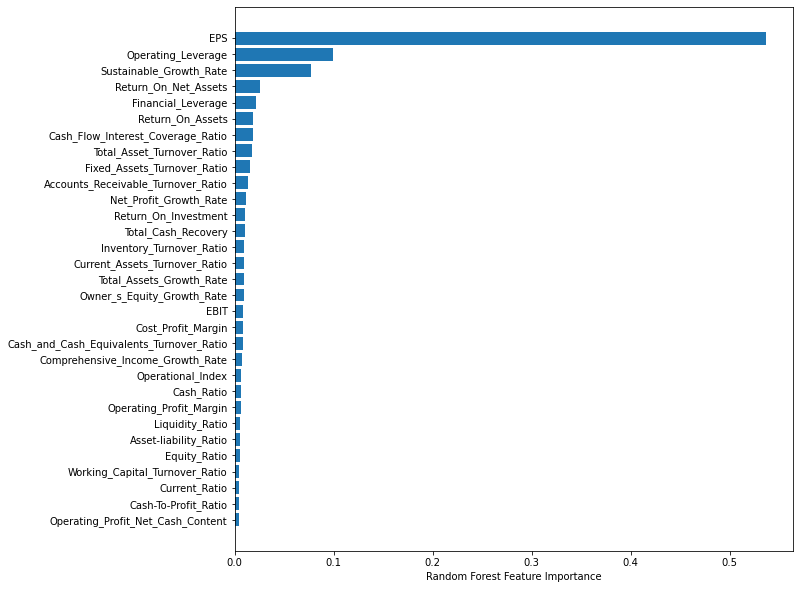

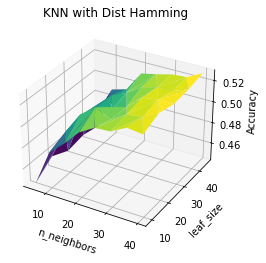

currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in KNN iteration 22 out of 40
currently in KNN iteration 23 out of 40
currently in KNN iteration 24 out of 40
currently in KNN iteration 25 out of 40
currently

<Figure size 432x288 with 0 Axes>

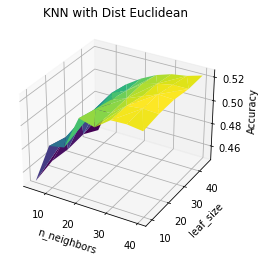

currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in KNN iteration 22 out of 40
currently in KNN iteration 23 out of 40
currently in KNN iteration 24 out of 40
currently in KNN iteration 25 out of 40
currently

<Figure size 432x288 with 0 Axes>

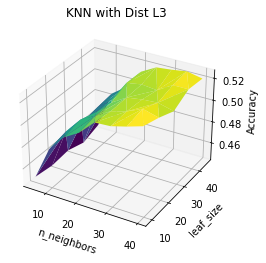

The corresponding accuracy in tuning for KNN is 0.5281398171270262
The best hyper-parameter of KNN without deduction is:N_neighbors = 40,  Leaf_size = 45, and Distance_measure = 1
The corresponding accuracy in testing for KNN is 0.5223794950267788


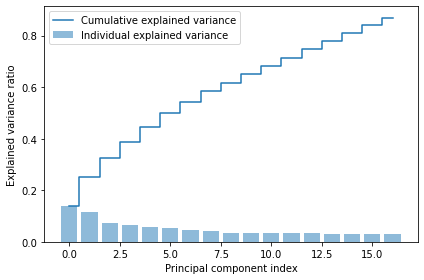

The model is: PCAKNN
Here is the tuning for KNN
Distance_measure=1 refers to Hamming distance, and 2 refers to Euclidean distance,3 refers to l3 distance
currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in KN

C:\Users\andre\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


<Figure size 432x288 with 0 Axes>

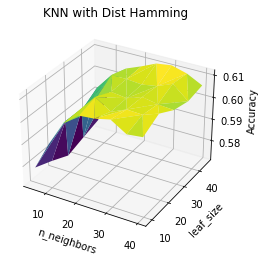

currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in KNN iteration 22 out of 40
currently in KNN iteration 23 out of 40
currently in KNN iteration 24 out of 40
currently in KNN iteration 25 out of 40
currently

<Figure size 432x288 with 0 Axes>

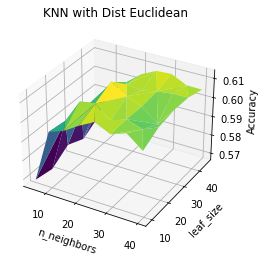

currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in KNN iteration 22 out of 40
currently in KNN iteration 23 out of 40
currently in KNN iteration 24 out of 40
currently in KNN iteration 25 out of 40
currently

<Figure size 432x288 with 0 Axes>

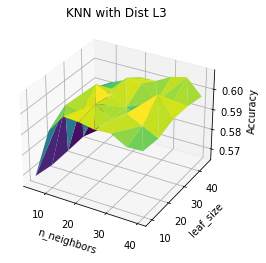

The corresponding accuracy in tuning for KNN is 0.6134201312771244
The best hyper-parameter of KNN without deduction is:N_neighbors = 20,  Leaf_size = 27, and Distance_measure = 2
The corresponding accuracy in testing for KNN is 0.6092195868400918


C:\Users\andre\.conda\envs\py37\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
C:\Users\andre\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

The model is: LassoKNN
Here is the tuning for KNN
Distance_measure=1 refers to Hamming distance, and 2 refers to Euclidean distance,3 refers to l3 distance
currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in 

C:\Users\andre\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


<Figure size 432x288 with 0 Axes>

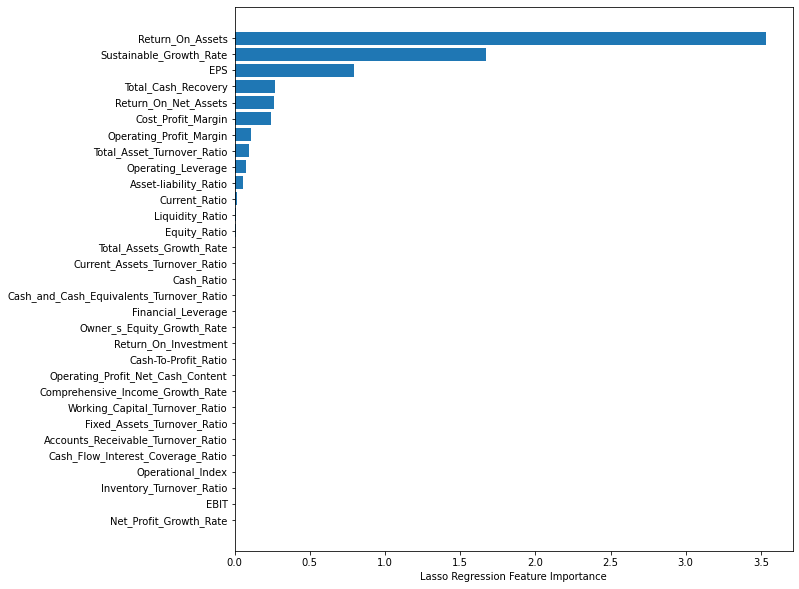

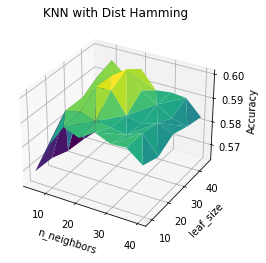

currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in KNN iteration 22 out of 40
currently in KNN iteration 23 out of 40
currently in KNN iteration 24 out of 40
currently in KNN iteration 25 out of 40
currently

<Figure size 432x288 with 0 Axes>

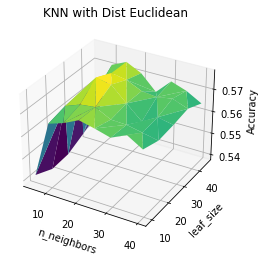

currently in KNN iteration 1 out of 40
currently in KNN iteration 2 out of 40
currently in KNN iteration 3 out of 40
currently in KNN iteration 4 out of 40
currently in KNN iteration 5 out of 40
currently in KNN iteration 6 out of 40
currently in KNN iteration 7 out of 40
currently in KNN iteration 8 out of 40
currently in KNN iteration 9 out of 40
currently in KNN iteration 10 out of 40
currently in KNN iteration 11 out of 40
currently in KNN iteration 12 out of 40
currently in KNN iteration 13 out of 40
currently in KNN iteration 14 out of 40
currently in KNN iteration 15 out of 40
currently in KNN iteration 16 out of 40
currently in KNN iteration 17 out of 40
currently in KNN iteration 18 out of 40
currently in KNN iteration 19 out of 40
currently in KNN iteration 20 out of 40
currently in KNN iteration 21 out of 40
currently in KNN iteration 22 out of 40
currently in KNN iteration 23 out of 40
currently in KNN iteration 24 out of 40
currently in KNN iteration 25 out of 40
currently

<Figure size 432x288 with 0 Axes>

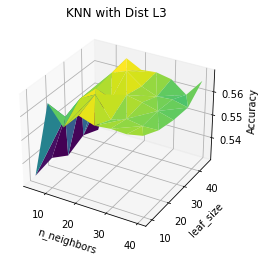

The corresponding accuracy in tuning for KNN is 0.6009898523926622
The best hyper-parameter of KNN without deduction is:N_neighbors = 20,  Leaf_size = 36, and Distance_measure = 1
The corresponding accuracy in testing for KNN is 0.6390589135424637


<Figure size 432x288 with 0 Axes>

In [14]:
feature_selection=['Random_forest','PCA','Lasso']
Model_selection=['KNN','LSTM','SVM','MLP']
y_pred = pd.DataFrame(columns=[]) 
for i in range(0,3):
    if (i==0):
        feature_after_tuned=rf_feature(feature_global.values,response_global)
    if (i==1):
        feature_after_tuned=pca_feature(x_std)
    if (i==2):
        feature_after_tuned=lasso_feature(feature_global.values,response_global)
        
        

    kfolds = KFold(n_splits=5,shuffle=True)
    x_train,x_test,y_train,y_test = train_test_split(feature_after_tuned,response_global_class,test_size=0.2)
    x_train_1,x_train_2,y_train_1,y_train_2=train_test_split(x_train,y_train,test_size=0.3)
    

    print("The model is: "+feature_selection[i]+"KNN")
    pred,Acc= KNN(x_train,y_train,x_train_2,y_train_2,x_test,y_test)
    y_pred.insert(y_pred.shape[1],feature_selection[i]+"KNN", pred)


In [15]:
y_pred.to_csv("knn_pred.csv", index=False)

In [16]:
y_pred

,Random_forestKNN,PCAKNN,LassoKNN
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,1
4,0,1,0
...,...,...,...
5223,0,0,0
5224,0,0,1
5225,0,0,0
5226,0,1,1
